In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from time import time
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from mcmc import dm
from mcmc import utils
from tqdm import tqdm

In [ ]:
# plt.style.available

In [ ]:
plt.style.use('seaborn-v0_8-deep') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

# tes potential

In [ ]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
log_nu0 = [-3]
R = [3.4E-3]
zsun = [0]
w0 = [-7]
log_sigmaw = [2]
log_a = [.5]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0+ log_sigmaw + log_a]).flatten()
theta.shape

In [ ]:
z_start = -1000
z_end = 1000
dz = 1.

z = np.arange(z_start, z_end, dz)
print(z)
phi = dm.potential(z, theta)

In [ ]:
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()

# tes fz

In [ ]:
fz = dm.fz(z, theta)
fz

In [ ]:
plt.plot(z, fz)

# tes fw

In [ ]:
w = np.linspace(-50, 30, 1000)

fw = dm.fw(w, theta)
fw.shape

In [ ]:
plt.plot(w, fw)

# tes log_prob

In [ ]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
log_nu0 = [7]
R = [3.4E-3]
zsun = [0]
w0 = [-7]
log_sigmaw = [2]
log_a = [6]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0+ log_sigmaw + log_a]).flatten()
theta.shape

In [ ]:
zdata = np.loadtxt('data/z1.csv', skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]

wdata = np.loadtxt('data/w1.csv', skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
zbound = 50

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [ ]:
locs = dict(
    rhoDM=-0.02,
    log_nu0=5,
    R=3.4E-3,
    zsun=-20,
    w0=-10,
    log_sigmaw=0,
    log_a=5
)

scales = dict(
    rhoDM=0.08,
    log_nu0=4,
    R=0.6E-3,
    zsun=40,
    w0=5,
    log_sigmaw=6,
    log_a=4
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

In [ ]:
dm.log_prob(np.array([theta]), zdata, wdata, locs, scales)

# mcmc

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from mcmc import dm
from mcmc import utils
from tqdm import tqdm
plt.style.use('seaborn-v0_8-deep') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

/home/alisyaifudin/anaconda3/envs/maturin/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
log_nu0 = [5.7]
R = [3.4E-3]
zsun = [20]
w0 = [-7]
log_sigmaw = [1.5]
log_a = [7]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0+ log_sigmaw + log_a]).flatten()
theta.shape

(31,)

In [3]:
ndim = 31
nwalkers = 2*ndim+2
nsteps = 10

In [4]:
locs = dict(
    rhoDM=-0.02,
    log_nu0=5,
    R=3.4E-3,
    zsun=-50,
    w0=-10,
    log_sigmaw=0,
    log_a=5
)

scales = dict(
    rhoDM=0.08,
    log_nu0=4,
    R=0.6E-3,
    zsun=100,
    w0=5,
    log_sigmaw=3,
    log_a=4
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.02, 0.016, 0.06),
 ('log_nu0', 5.0, 5.7, 9.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 20.0, 50.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw', 0.0, 1.5, 3.0),
 ('log_a', 5.0, 7.0, 9.0)]

In [5]:
p0 = dm.generate_p0(nwalkers, locs, scales, kind=1)
p0.shape

(64, 31)

In [6]:
zdata = np.loadtxt('data/z1.csv', skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]
dz = zmid[1] - zmid[0]

wdata = np.loadtxt('data/w1.csv', skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
dw = wmid[1] - wmid[0]
zbound = 50

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [7]:
dm.log_prob(p0, zdata, wdata, locs, scales)

(array([48.73010726, 50.66616123, 46.60710685, 47.4601748 , 45.48720988,
        52.63011146, 47.28169008, 53.76389918, 48.59699652, 51.19030562,
        49.54455134, 49.90883987, 37.61285348, 46.04248679, 49.94831038,
        42.55440573, 50.48570777, 47.98432827, 45.72231122, 45.87369354,
        51.87687506, 50.55794629, 48.12650963, 52.42374132, 46.61753433,
        50.25966166, 43.97093623, 49.21593773, 45.66976146, 52.96393601,
        50.44634965, 46.33183858, 43.16305604, 49.04425313, 51.68473941,
        54.32840065, 52.68612161, 44.66910762, 49.76290429, 46.02716182,
        49.62253557, 44.27098492, 49.53226699, 50.77955618, 49.72511595,
        48.87607604, 47.38093601, 48.52796058, 47.3537796 , 42.40427376,
        45.51650013, 44.99058786, 45.01357355, 46.9143903 , 50.8169484 ,
        48.87543097, 51.00905419, 47.99951073, 49.72252348, 47.84978026,
        45.843321  , 44.37010027, 47.25140168, 47.53927618]),
 array([-2.71142420e+04, -7.15680812e+04, -1.20705766e+05, -1.

(31,)


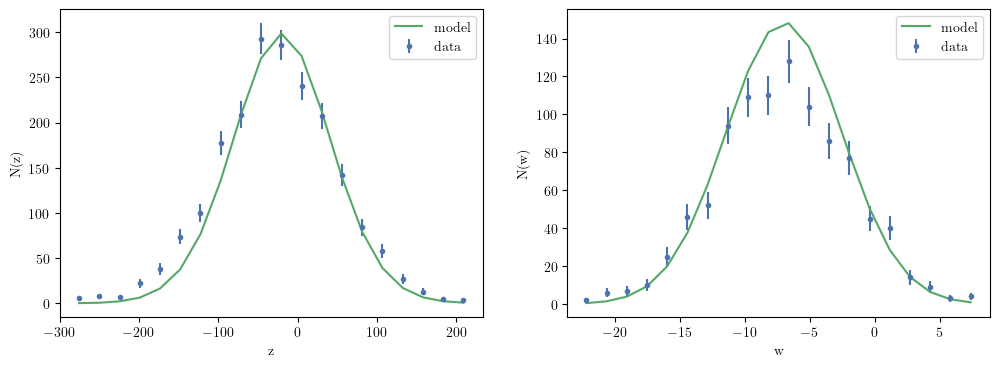

(array([60.43181126]), array([-119.7060093]))

In [8]:
print(theta.shape)
zmod = dm.fz(zmid, theta)
wmod = dm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dm.log_prob(np.array([theta]), zdata, wdata, locs, scales)

In [9]:
t0 = time()
sampler = dm.run_mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True)
print(time() - t0, "s")
chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

Acceptance rate: 0.2720625
25.932616233825684 s


 62%|██████▍   | 310/500 [00:16<00:10, 19.18it/s]<00:11, 19.11it/s]

In [ ]:
# t0 = time()
# sampler = dm.run_mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True, batch=5)
# print(time() - t0, "s")
# chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

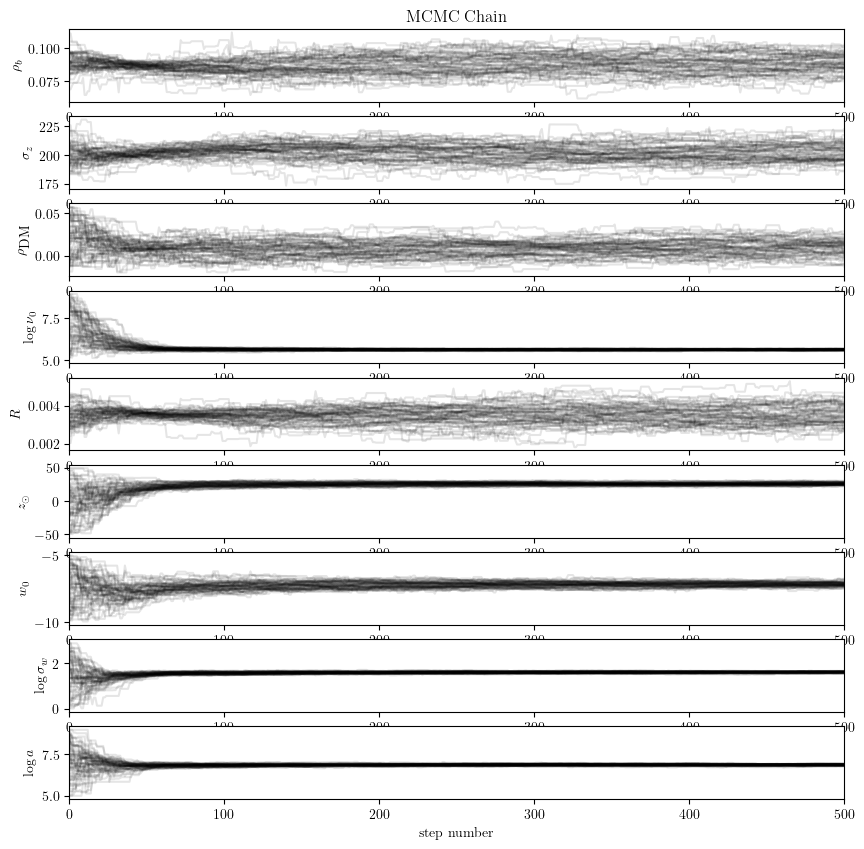

In [10]:
rhob = chain[:, :, :12].sum(axis=2).T
sigmaz = chain[:, :, 12:24].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw = chain[:, :, 29].T
log_a = chain[:, :, 30].T

params = np.array([rhob, sigmaz, rhoDM, nu0, R, zsun, w0, log_sigmaw, log_a]).T

labels = labels = [r'$\rho_b$', r'$\sigma_z$', r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
utils.plot_chain(params, labels)

In [11]:
p0_next = chain[-1, :, :]
t0 = time()
sampler = dm.run_mcmc(1000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True)
print(time() - t0, "s")
chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

Acceptance rate: 0.243890625
58.67341685295105 s


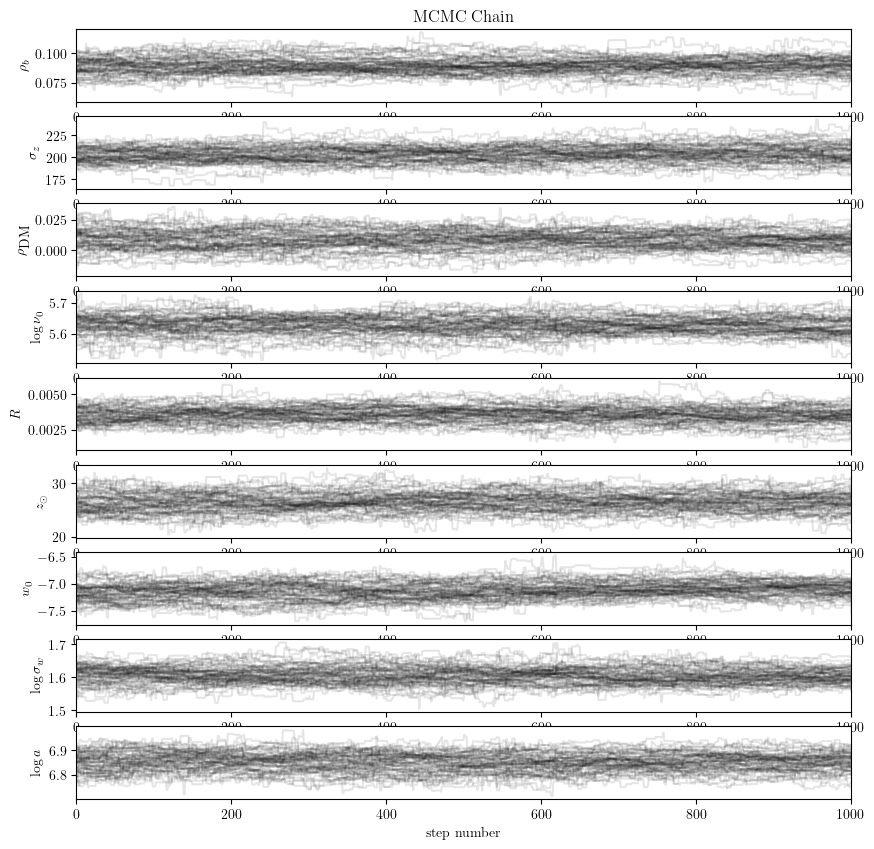

In [12]:
rhob = chain[:, :, :12].sum(axis=2).T
sigmaz = chain[:, :, 12:24].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw = chain[:, :, 29].T
log_a = chain[:, :, 30].T

params = np.array([rhob, sigmaz, rhoDM, nu0, R, zsun, w0, log_sigmaw, log_a]).T

labels = labels = [r'$\rho_b$', r'$\sigma_z$', r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
utils.plot_chain(params, labels)

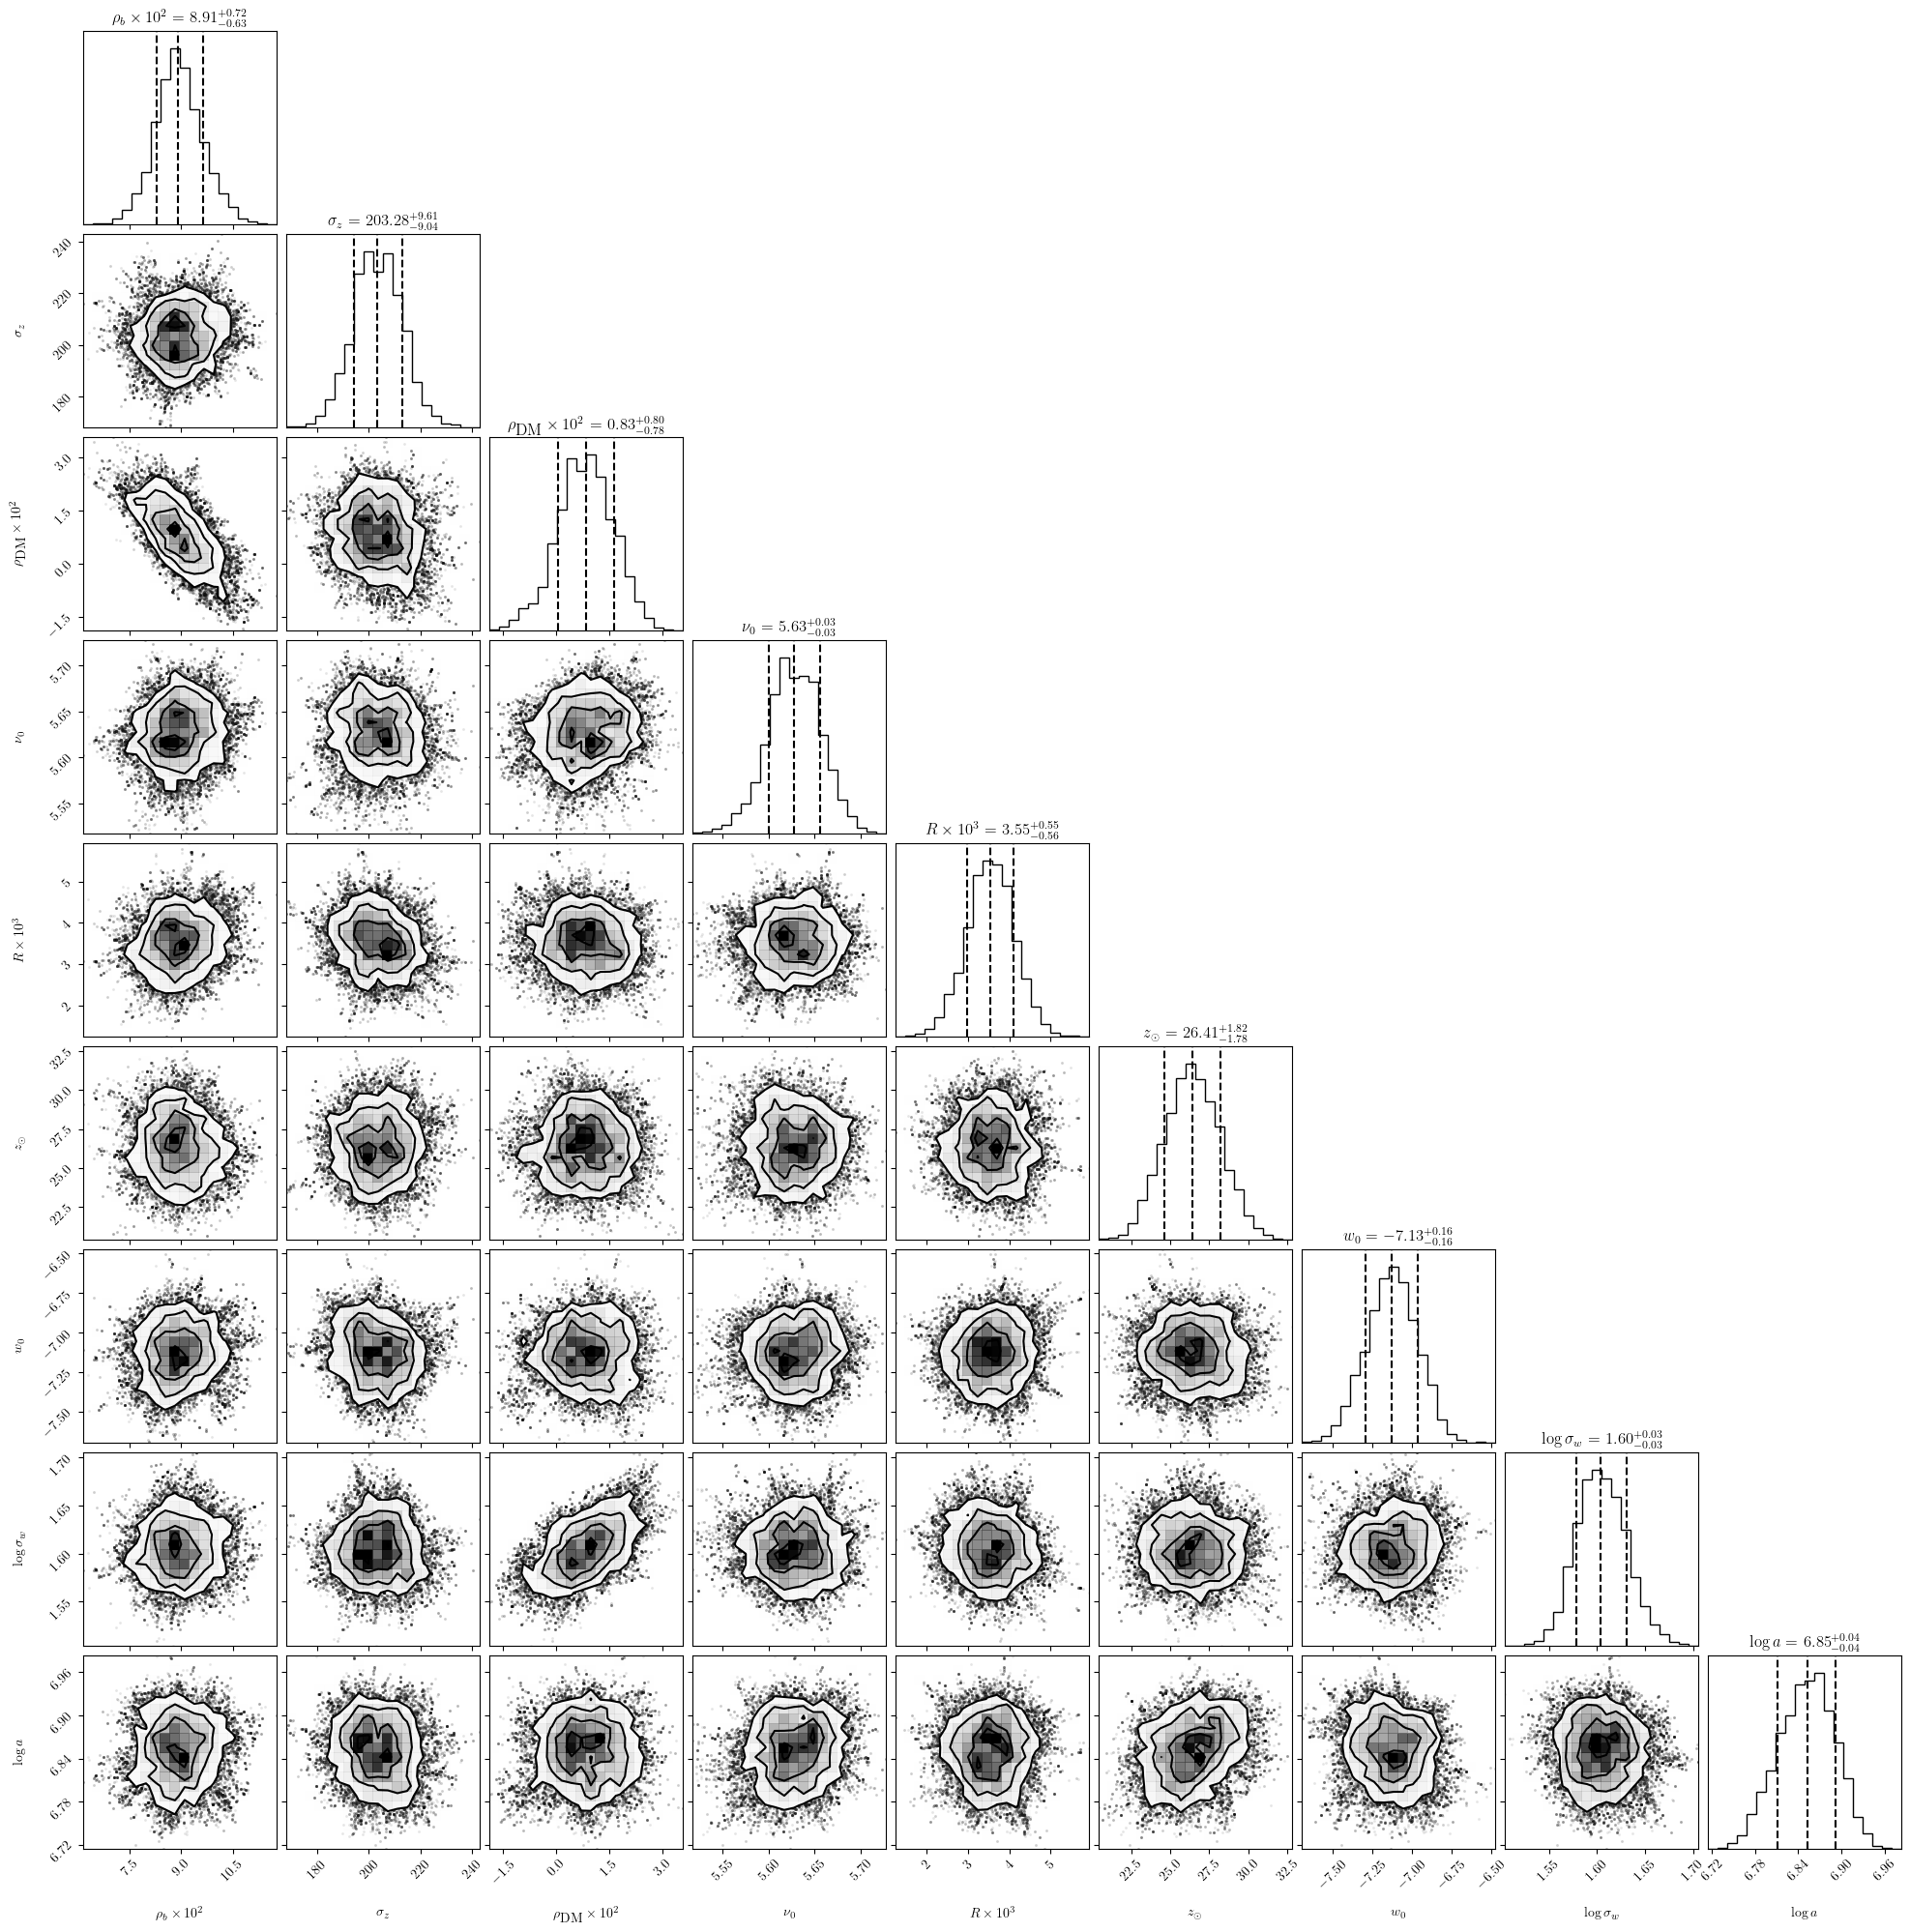

In [13]:
rhob_f = rhob/1E-2
sigmaz_f = sigmaz
rhoDM_f = rhoDM/1E-2
nu0_f = nu0
R_f = R/1E-3
zsun_f = zsun
w0_f = w0
log_sigmaw_f = log_sigmaw
log_a_f = log_a

flat_samples = np.array([rhob_f, sigmaz_f, rhoDM_f, nu0_f, R_f, zsun_f, w0_f, log_sigmaw_f, log_a_f]).T

labels = [r'$\rho_b\times 10^2$', r'$\sigma_z$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
utils.plot_corner(flat_samples, labels)

# fit

In [26]:
def plot_fit(zdata, wdata, chain, ndim, n=50000, alpha=0.2, path=None, dpi=100):
    zmid, znum, zerr = zdata
    wmid, wnum, werr = wdata
    
    flat_samples = chain.reshape((-1, ndim))
    zs = np.linspace(zmid.min()*1.1, zmid.max()*1.1, 100)
    ws = np.linspace(wmid.min()*1.1, wmid.max()*1.1, 100)
    fzs = np.empty((n, len(zs)))
    fws = np.empty((n, len(ws)))
    for i in tqdm(range(n)):
        ind = np.random.randint(len(flat_samples))
        theta = flat_samples[ind]
        fzs[i] = dm.fz(zs, theta ,1.)
        fws[i] = dm.fw(ws, theta ,1.)
    fz_log_mean = np.log(fzs).mean(axis=0)
    fz_log_std = np.log(fzs).std(axis=0)
    fz_mean = np.exp(fz_log_mean)

    fw_log_mean = np.log(fws).mean(axis=0)
    fw_log_std = np.log(fws).std(axis=0)
    fw_mean = np.exp(fw_log_mean)

    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    axes[0].errorbar(zmid, znum, yerr=zerr, color='k', alpha=0.5, capsize=2, fmt=".")
    axes[0].fill_between(zs, np.exp(fz_log_mean - 3*fz_log_std), np.exp(fz_log_mean + 3*fz_log_std), alpha=alpha, color="C0")
    axes[0].fill_between(zs, np.exp(fz_log_mean - 2*fz_log_std), np.exp(fz_log_mean + 2*fz_log_std), alpha=alpha, color="C0")
    axes[0].fill_between(zs, np.exp(fz_log_mean - fz_log_std), np.exp(fz_log_mean + fz_log_std), alpha=alpha, color="C0")
    axes[0].plot(zs, fz_mean, c="C0", ls="--")
    axes[0].set_ylabel(r'$\nu(z)$')
    axes[0].set_xlabel(r'$z$ [pc]')
    axes[0].set_yscale('log')

    axes[1].errorbar(wmid, wnum, yerr=werr, color='k', alpha=0.5, capsize=2, fmt=".")
    axes[1].fill_between(ws, np.exp(fw_log_mean - 3*fw_log_std), np.exp(fw_log_mean + 3*fw_log_std), alpha=alpha, color="C0")
    axes[1].fill_between(ws, np.exp(fw_log_mean - 2*fw_log_std), np.exp(fw_log_mean + 2*fw_log_std), alpha=alpha, color="C0")
    axes[1].fill_between(ws, np.exp(fw_log_mean - fw_log_std), np.exp(fw_log_mean + fw_log_std), alpha=alpha, color="C0")
    axes[1].plot(ws, fw_mean, c="C0", ls="--")
    axes[1].set_ylabel(r'$f_0(w)$')
    axes[1].set_xlabel(r'$w$ [km/s]]')
    axes[1].set_yscale('log')
    if path is not None:
        fig.savefig(path, dpi=dpi)
    plt.show()

100%|██████████| 50000/50000 [00:25<00:00, 1981.69it/s]


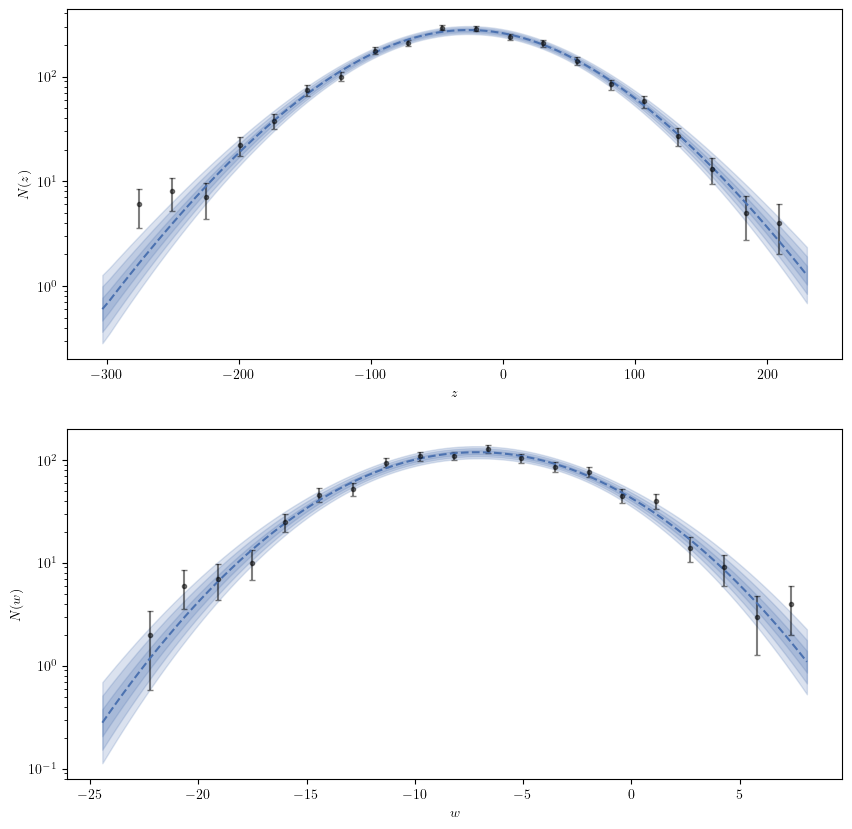

In [25]:
plot_fit(zdata, wdata, chain, ndim)

# 2 comp

In [27]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from time import time
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from mcmc import dm
from mcmc import utils
from tqdm import tqdm

In [29]:
plt.style.use('seaborn-v0_8-deep') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

## tes potential

In [30]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
log_nu0 = [-3]
R = [3.4E-3]
zsun = [0]
w0 = [-7]
log_sigmaw1 = [5.]
log_a1 = [5.]
log_sigmaw2 = [10.]
log_a2 = [2.]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [31]:
z_start = -1000
z_end = 1000
dz = 1.

z = np.arange(z_start, z_end, dz)
print(z)
phi = dm.potential(z, theta)

[-1000.  -999.  -998. ...   997.   998.   999.]


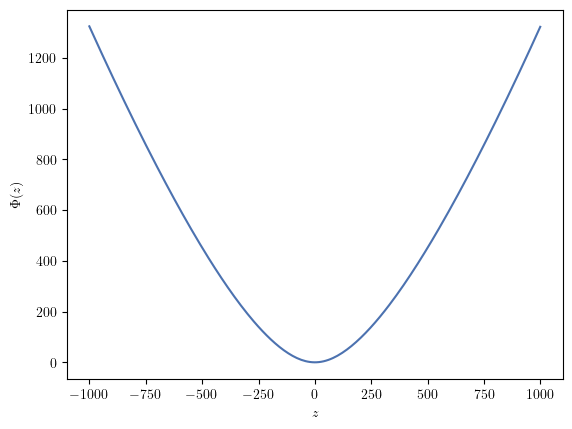

In [32]:
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()

# tes fz

In [61]:
fz = dm.fz(z, theta)
fz

array([140.16450646, 140.17637465, 140.1882439 , ..., 140.2001142 ,
       140.1882439 , 140.17637465])

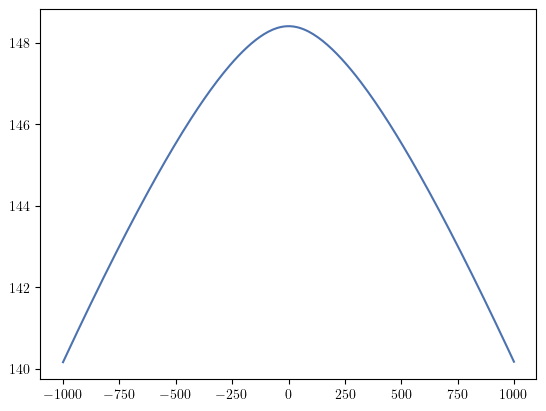

In [62]:
plt.plot(z, fz)

# tes fw

In [35]:
w = np.linspace(-50, 30, 1000)

fw = dm.fw(w, theta)
fw.shape

(1000,)

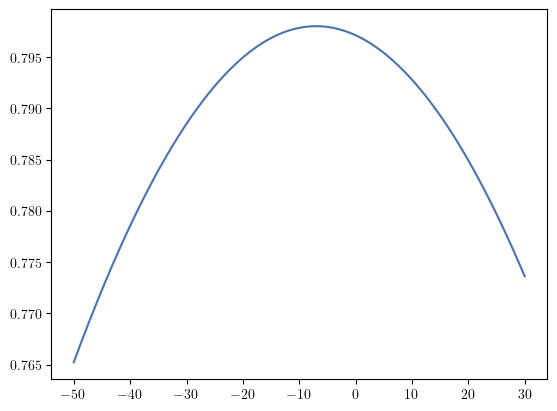

In [36]:
plt.plot(w, fw)

# tes log_prob

In [89]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
log_nu0 = [6.2]
R = [3.4E-3]
zsun = [20]
w0 = [-7]
log_sigmaw1 = [1.5]
log_a1 = [7.]
log_sigmaw2 = [3.]
log_a2 = [3.]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [38]:
zdata = np.loadtxt('data/z2.csv', skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]

wdata = np.loadtxt('data/w2.csv', skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
zbound = 50

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [45]:
locs = dict(
    rhoDM=-0.02,
    log_nu0=5,
    R=3.4E-3,
    zsun=-20,
    w0=-10,
    log_sigmaw1=0,
    log_a1=4,
    log_sigmaw2=6,
    log_a2=0
)

scales = dict(
    rhoDM=0.08,
    log_nu0=4,
    R=0.6E-3,
    zsun=40,
    w0=5,
    log_sigmaw=6,
    log_a=12,
    log_sigmaw2=16,
    log_a2=4
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.02, 0.016, 0.06),
 ('log_nu0', 5.0, 7.0, 9.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -20.0, 0.0, 20.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw1', 0.0, 5.0, 6.0),
 ('log_a1', 4.0, 5.0, 16.0),
 ('log_sigmaw2', 6.0, 10.0, 22.0),
 ('log_a2', 0.0, 2.0, 4.0)]

In [46]:
dm.log_prob(np.array([theta]), zdata, wdata, locs, scales)

(array([55.39745944]), array([-1439816.96221533]))

# mcmc

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from mcmc import dm
from mcmc import utils
from tqdm import tqdm
plt.style.use('seaborn-v0_8-deep') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

/home/alisyaifudin/anaconda3/envs/maturin/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
log_nu0 = [5.]
R = [3.4E-3]
zsun = [0]
w0 = [-7]
log_sigmaw1 = [5.]
log_a1 = [5.]
log_sigmaw2 = [10.]
log_a2 = [2.]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [64]:
ndim = 33
nwalkers = 2*ndim+2
nsteps = 10

In [100]:
locs = dict(
    rhoDM=-0.02,
    log_nu0=5,
    R=3.4E-3,
    zsun=-20,
    w0=-10,
    log_sigmaw1=0,
    log_a1=5,
    log_sigmaw2=2,
    log_a2=0
)

scales = dict(
    rhoDM=0.08,
    log_nu0=4,
    R=0.6E-3,
    zsun=40,
    w0=5,
    log_sigmaw=3,
    log_a=5,
    log_sigmaw2=10,
    log_a2=5
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.02, 0.016, 0.06),
 ('log_nu0', 5.0, 6.2, 9.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -20.0, 20.0, 20.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw1', 0.0, 1.5, 3.0),
 ('log_a1', 5.0, 7.0, 10.0),
 ('log_sigmaw2', 2.0, 3.0, 12.0),
 ('log_a2', 0.0, 3.0, 5.0)]

In [101]:
p0 = dm.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(68, 33)

In [102]:
zdata = np.loadtxt('data/z2.csv', skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]
dz = zmid[1] - zmid[0]

wdata = np.loadtxt('data/w2.csv', skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
dw = wmid[1] - wmid[0]
zbound = 50

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [103]:
dm.log_prob(p0, zdata, wdata, locs, scales)

(array([48.83935094, 45.84632843, 45.14277965, 44.03794938, 47.43156953,
        45.75984474, 49.66326377, 42.47245914, 48.77490689, 42.23781262,
        41.35694174, 46.03482764, 35.23015379, 39.16854958, 39.34117177,
        45.71853455, 35.15231388, 40.59400102, 41.73023484, 44.75425064,
        45.87181235, 45.06358411, 41.32700647, 42.1889301 , 47.8807048 ,
        48.04144218, 48.36185185, 49.38631412, 44.83322894, 43.78676988,
        48.01706816, 45.63349461, 45.5830056 , 46.40137304, 38.70281102,
        48.11550755, 47.50882373, 49.02743698, 41.70916075, 44.40224399,
        48.30524688, 46.56733113, 43.10068231, 50.52653373, 44.16697017,
        44.14209266, 48.63112327, 39.81477179, 40.15627009, 46.92586501,
        51.00601076, 50.29510689, 38.94861704, 46.64630927, 37.06456698,
        47.35321035, 49.14724785, 50.47297287, 40.71255988, 49.91548437,
        48.74954946, 35.41640476, 47.39650322, 47.55098661, 38.05892262,
        44.33259877, 44.37469921, 43.01296613]),
 a

(33,)


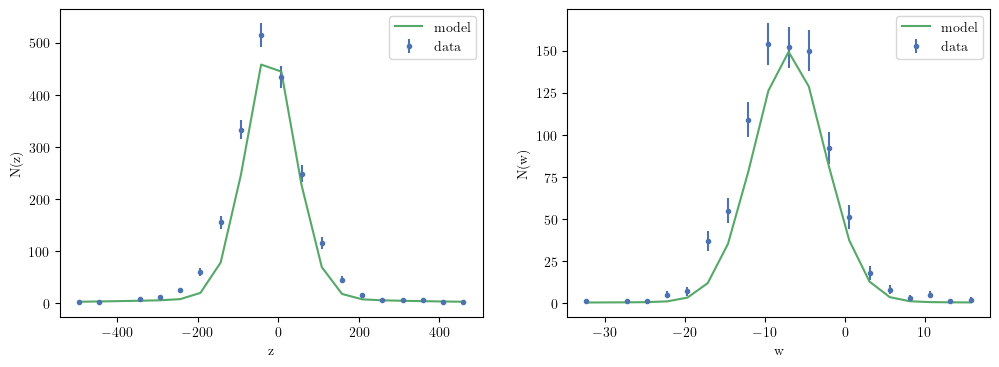

(array([-inf]), array([-inf]))

In [104]:
print(theta.shape)
zmod = dm.fz(zmid, theta)
wmod = dm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dm.log_prob(np.array([theta]), zdata, wdata, locs, scales)

In [ ]:
t0 = time()
sampler = dm.run_mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True)
print(time() - t0, "s")
chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

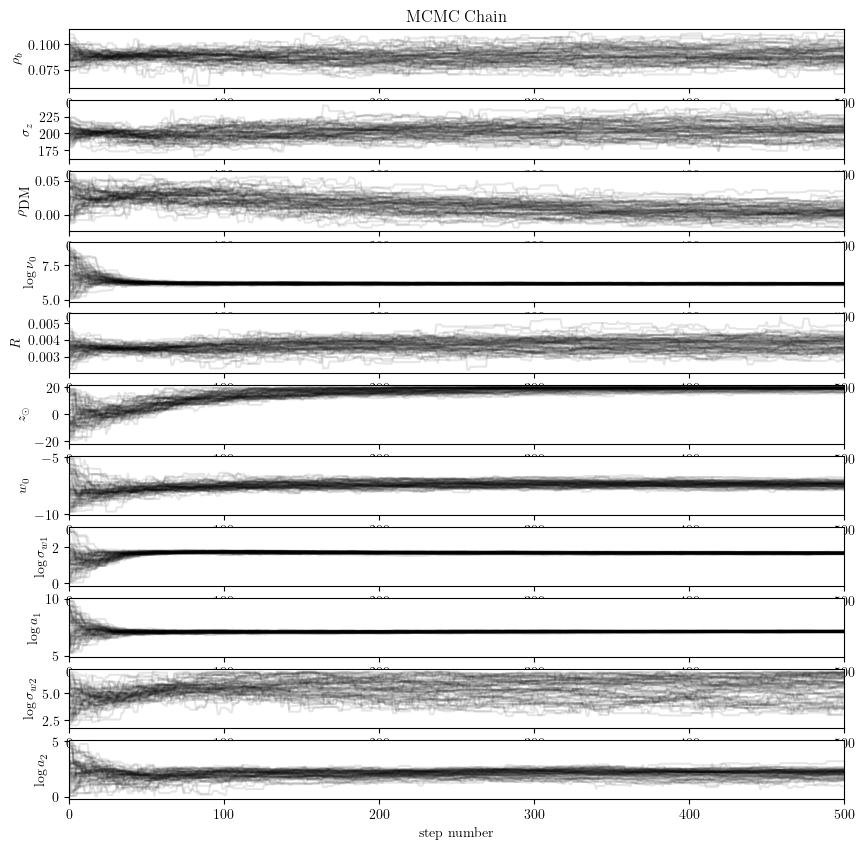

In [99]:
rhob = chain[:, :, :12].sum(axis=2).T
sigmaz = chain[:, :, 12:24].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw1 = chain[:, :, 29].T
log_a1 = chain[:, :, 30].T
log_sigmaw2 = chain[:, :, 31].T
log_a2 = chain[:, :, 32].T

params = np.array([rhob, sigmaz, rhoDM, nu0, R, zsun, w0, log_sigmaw1, log_a1, log_sigmaw2, log_a2]).T

labels = labels = [r'$\rho_b$', r'$\sigma_z$', r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
utils.plot_chain(params, labels)

In [ ]:
p0_next = chain[-1, :, :]
t0 = time()
sampler = dm.run_mcmc(1000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True)
print(time() - t0, "s")
chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

In [ ]:
rhob = chain[:, :, :12].sum(axis=2).T
sigmaz = chain[:, :, 12:24].sum(axis=2).T
rhoDM = chain[:, :, 24].T
nu0 = chain[:, :, 25].T
R = chain[:, :, 26].T
zsun = chain[:, :, 27].T
w0 = chain[:, :, 28].T
log_sigmaw1 = chain[:, :, 29].T
log_a1 = chain[:, :, 30].T
log_sigmaw2 = chain[:, :, 31].T
log_a2 = chain[:, :, 32].T

params = np.array([rhob, sigmaz, rhoDM, nu0, R, zsun, w0, log_sigmaw1, log_a1, log_sigmaw2, log_a2]).T

labels = labels = [r'$\rho_b$', r'$\sigma_z$', r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
utils.plot_chain(params, labels)

In [ ]:
rhob_f = rhob/1E-2
sigmaz_f = sigmaz
rhoDM_f = rhoDM/1E-2
nu0_f = nu0
R_f = R/1E-3
zsun_f = zsun
w0_f = w0
log_sigmaw1_f = log_sigmaw1
log_a1_f = log_a1
log_sigmaw2_f = log_sigmaw2
log_a2_f = log_a2

flat_samples = np.array([rhob_f, sigmaz_f, rhoDM_f, nu0_f, R_f, zsun_f, w0_f, log_sigmaw1_f, log_a1_f, log_sigmaw2_f, log_a2_f]).T

labels = [r'$\rho_b\times 10^2$', r'$\sigma_z$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
utils.plot_corner(flat_samples, labels)

In [ ]:
def plot_fit(zdata, wdata, chain, ndim, n=50000, alpha=0.2, path=None, dpi=100):
    zmid, znum, zerr = zdata
    wmid, wnum, werr = wdata
    
    flat_samples = chain.reshape((-1, ndim))
    zs = np.linspace(zmid.min()*1.1, zmid.max()*1.1, 100)
    ws = np.linspace(wmid.min()*1.1, wmid.max()*1.1, 100)
    fzs = np.empty((n, len(zs)))
    fws = np.empty((n, len(ws)))
    for i in tqdm(range(n)):
        ind = np.random.randint(len(flat_samples))
        theta = flat_samples[ind]
        fzs[i] = dm.fz(zs, theta ,1.)
        fws[i] = dm.fw(ws, theta ,1.)
    fz_log_mean = np.log(fzs).mean(axis=0)
    fz_log_std = np.log(fzs).std(axis=0)
    fz_mean = np.exp(fz_log_mean)

    fw_log_mean = np.log(fws).mean(axis=0)
    fw_log_std = np.log(fws).std(axis=0)
    fw_mean = np.exp(fw_log_mean)

    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    axes[0].errorbar(zmid, znum, yerr=zerr, color='k', alpha=0.5, capsize=2, fmt=".")
    axes[0].fill_between(zs, np.exp(fz_log_mean - 3*fz_log_std), np.exp(fz_log_mean + 3*fz_log_std), alpha=alpha, color="C0")
    axes[0].fill_between(zs, np.exp(fz_log_mean - 2*fz_log_std), np.exp(fz_log_mean + 2*fz_log_std), alpha=alpha, color="C0")
    axes[0].fill_between(zs, np.exp(fz_log_mean - fz_log_std), np.exp(fz_log_mean + fz_log_std), alpha=alpha, color="C0")
    axes[0].plot(zs, fz_mean, c="C0", ls="--")
    axes[0].set_ylabel(r'$\nu(z)$')
    axes[0].set_xlabel(r'$z$ [pc]')
    axes[0].set_yscale('log')

    axes[1].errorbar(wmid, wnum, yerr=werr, color='k', alpha=0.5, capsize=2, fmt=".")
    axes[1].fill_between(ws, np.exp(fw_log_mean - 3*fw_log_std), np.exp(fw_log_mean + 3*fw_log_std), alpha=alpha, color="C0")
    axes[1].fill_between(ws, np.exp(fw_log_mean - 2*fw_log_std), np.exp(fw_log_mean + 2*fw_log_std), alpha=alpha, color="C0")
    axes[1].fill_between(ws, np.exp(fw_log_mean - fw_log_std), np.exp(fw_log_mean + fw_log_std), alpha=alpha, color="C0")
    axes[1].plot(ws, fw_mean, c="C0", ls="--")
    axes[1].set_ylabel(r'$f_0(w)$')
    axes[1].set_xlabel(r'$w$ [km/s]]')
    axes[1].set_yscale('log')
    if path is not None:
        fig.savefig(path, dpi=dpi)
    plt.show()

In [ ]:
plot_fit(zdata, wdata, chain, ndim)